# Starting Off

In our Titanic dataset, about 20% of our observations do not have a value for 'Age'. We could possibly turn the fact that they are missing data into its own data column.

`df['missing_age'] = df['Age'].isnull()`

So now `missing_age` is a new binary variable that shows whether or not we have an age listed for this category.  

Do you think it is a good thing to include this variable into your model to predeict surviorship. Come up with one reason why this would be a good data transformation and one reason why it would not be a good one.  

# Implementing a K-Nearest Neighbors Model

## Objective: 
- To be able to implement a KNN classification model, and utilize a visualization to identify the best value of K.

## Agenda

- What is the **K-nearest neighbors** classification model?
- How do you use the sklearn grid search function?


## K-nearest neighbors (KNN) classification

- A simple model that classifies a new data point by looking at the data points 'nearest' to the new data point.
- KNN is an non parametric lazy learning algorithm.

**Lazy learning** or **Instance-based (IB)** learning methods simply store the training examples and postpone the generalization (building a model) until a new instance must be classified or prediction made.

**Non-parametric models** assume that the data distribution cannot be defined in
terms of such a finite set of parameters.

### How does the KNN algorithm work?


<img src='images/Knn_step_1.webp' width=500/>

Suppose P1 is the point, for which label needs to predict. 

First, you need to decide your size of $K$. $K$ is the number of nearest neighbors you want to tak into account when deciding how to classify the new data point.

Next, you need to find the $K$ nearest points. You find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. 

Then you classify new points by 'majority vote' of its $K$ neighbors.  Each object votes for their class and the class with the most votes is taken as the prediction. 





<img src='images/KNN_final.webp' width=500/>

KNN has the following basic steps:

1. Determin number of neighbors
2. Calculate distance
3. Find closest neighbors
4. Vote for labels

### Example training data

This example uses a multi-class problem and each color represents a different class. 

### KNN classification map (K=1)

![1NN classification map](images/04_1nn_map.png)

### KNN classification map (K=5)

![5NN classification map](images/04_5nn_map.png)

### Euclidean Distance

**Euclidean distance** refers to the distance between two points. These points can be in different dimensional space and are represented by different forms of coordinates. In one-dimensional space, the points are just on a straight number line.



### Measuring distance in a 2-d Space

In two-dimensional space, the coordinates are given as points on the x- and y-axes

![alt text](images/euclidean-distance.png)

### Measuring distance in a 3-d Space

In three-dimensional space, x-, y- and z-axes are used. 

$$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 +  (z_1-z_2)^2}$$
![alt text](images/vectorgraph.jpg)

### Euclidean Distance Equation
![alt text](images/euclidean-equation.png)

The source of this formula is in the Pythagorean theorem. 

### Voting

How to break ties:

1. When doing a binary classification, often use a odd K to avoid ties.
2. Multiple approaches for Multiclass problems:
    - Reduce the K by 1 to see who wins.
    - Weight the votes based on the distance of the neighbors

## Implementing the KNN Classifier with SKlearn

## Reviewing the Titanic dataset

We are using the Titanic dataset again. Instead of showing all of the cleanings steps, I have saved a cleaned version of the data for us to import

## Loading the data

In [2]:
import pandas as pd

titanic = pd.read_csv('cleaned_titanic.csv', index_col='PassengerId')

One thing that is new is I created a binary variable to classify passengars less than 10 years old.  I now need to convert that boolean into an integer

In [3]:
titanic['youngin'] = titanic['youngin'].astype('int')

In [4]:
# Split data to be used in the models
# Create matrix of features
X = titanic.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = titanic['Survived'] # y is the column we're trying to predict

In [5]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(889, 9)
(889,)


In [6]:
# Use x and y variables to split the training data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Importance of Scaling

Compare how the different the data looks when it is scaled versus non-scaled


<img src='images/nonnormal.png' width=500/>

<img src='images/normalized.png' width=500/>

#### Should we use a Standard Scaler or Min-Max Scaler?

https://sebastianraschka.com/Articles/2014_about_feature_scaling.html
http://datareality.blogspot.com/2016/11/scaling-normalizing-standardizing-which.html

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

## scikit-learn 4-step modeling pattern

**Step 1:** Import the class you plan to use

In [14]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [17]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [19]:
# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [20]:
# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.8071748878923767
F1: 0.7570621468926554


In [21]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[113  25]
 [ 18  67]]


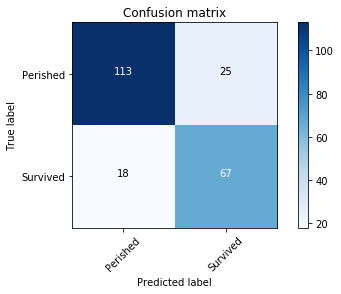

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

## Using a different value for K

In [23]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [24]:
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.8295964125560538
F1: 0.7682926829268293


In [25]:
from sklearn.metrics import classification_report  

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       138
           1       0.80      0.74      0.77        85

   micro avg       0.83      0.83      0.83       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



Confusion Matrix, without normalization
[[122  16]
 [ 22  63]]


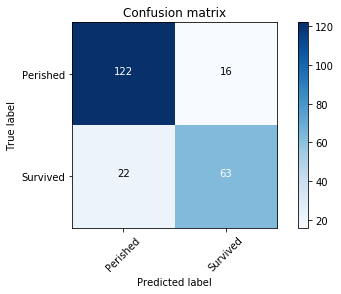

In [27]:
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

#### Search for an optimal value of K for KNN


In [39]:
k_range = list(range(1, 8))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = metrics.f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.8084789369146742, 0.826667666717868, 0.8197479218604077, 0.8254128695802017, 0.8282920778830917, 0.8296763375965691, 0.8368527056709966]


#### Visual comparison of different $K$s

This is not an ROC curve

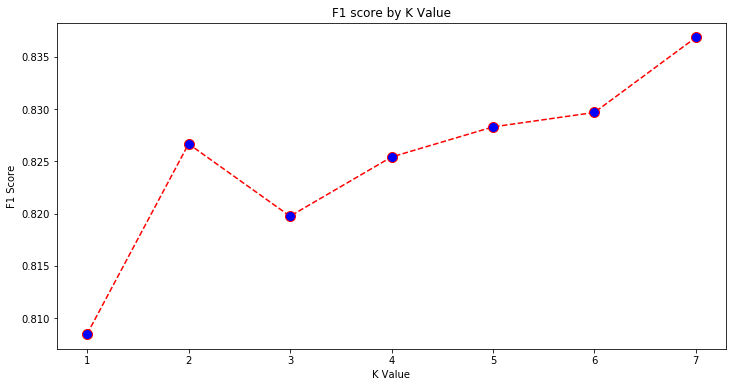

In [40]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

### What value of K performs best on our Test data?

### How do you think K size relates to our concepts of bias and variance?

<img src=images/K-NN_Neighborhood_Size_print.png>

## Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)

- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)